# Reaction pathway analysis

In the previous chapters, we have been looking at the behavior near the stable structure. In this chapter, we will analyze the reaction of substances.

<figure style="width:450px">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Activation_energy.svg/600px-Activation_energy.svg.png"/>
</figure>

The relationship between the activation energy $E_a$ and the enthalpy of reaction $\Delta H$ associated with the reaction X→Y.<br/>
Cited from [Wikipedia](https://en.wikipedia.org/wiki/Activation_energy).

<p></p>

In a reaction process in which product Y is formed from reactant X, the point with the maximum energy in the reaction path is called the **Transition State (TS)**, and the energy difference between reactant/product and the transition state is called the **Activation energy** $E_a$.

According to the Arrhenius equation, the reaction rate constant $k$ is wrriten as

$$k = A \exp \left(- \frac{E_a}{k_B T} \right)$$

where

 - $A$: pre-exponential factor (a constant independent of temperature)
 - $E_a$: activation energy
 - $k_B$: Boltzmann constant
 - $T$: temperature

Thus, the likelihood of a chemical reaction is determined by the activation energy $E_a$.

The energy of reactants/products does not change, but the activation energy changes as the reaction path changes with the surrounding environment, i.e., the presence of a catalyst.
If we can find a catalyst with lower activation energy, we can make the target reaction more likely to be produced.

Reference:


 - [Activation energy - Wikipedia](https://en.wikipedia.org/wiki/Activation_energy)
 - [Arrhenius equation - Wikipedia](https://en.wikipedia.org/wiki/Arrhenius_equation)

Even if reactant X and product Y are known, finding the transition state is not obvious. <br/>
In this section, we will try to calculate the activation energy using the NEB (Nudged Elastic Band) method, which searches for reaction pathways when the structures before and after the reaction are known.

 - https://databases.fysik.dtu.dk/ase/ase/neb.html

## NEB

<figure style="width: 720px">
　　　　<img src="../assets/neb-small-720.png" style="width: 720px"/>
  <figcaption>
      Diagram of the NEB method: After generating reaction path candidates (red line) as the initial configuration, structural relaxation is performed to search for reaction paths (blue line) that pass through transition states.
  </figcaption>
</figure>

[Note] The following content is based on the NEB Tutorial in the Matlantis.

We will investigate an organic chemical reaction called the Curtius rearrangement.

In the NEB method, we usually start with preparing the structures before and after a particular chemical reaction of interest.

This time, we will write down the structures directly.

In [1]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

import ase
from ase import Atoms
from ase.visualize import view
from ase.optimize import BFGS
from ase.optimize import FIRE
from ase.neb import NEB
from ase.build.rotate import minimize_rotation_and_translation

from pfp_api_client.pfp.calculators.ase_calculator import ASECalculator
from pfp_api_client.pfp.estimator import Estimator
from pfp_api_client.pfp.estimator import Estimator, EstimatorCalcMode

estimator = Estimator(calc_mode=EstimatorCalcMode.CRYSTAL, model_version="v2.0.0")
calculator = ASECalculator(estimator)

In [2]:
react = ase.Atoms(
    symbols="C2NON2H3",
    positions = [
        [ 2.12, -0.48,  0.00],
        [ 0.76,  0.16, -0.00],
        [-0.28, -0.79, -0.00],
        [ 0.57,  1.35,  0.00],
        [-1.42, -0.28,  0.00],
        [-2.48,  0.07,  0.00],
        [ 2.67, -0.14, -0.88],
        [ 2.06, -1.57, -0.00],
        [ 2.67, -0.14,  0.88],
    ],
)

prod = ase.Atoms(
    symbols="C2NON2H3",
    positions=[
        [ 2.30, -0.87,  0.00],
        [ 0.68,  0.92, -0.00],
        [ 0.99, -0.25,  0.00],
        [ 0.25,  2.03,  0.00],
        [-2.34,  0.11,  0.00],
        [-3.13, -0.67, -0.00],
        [ 2.87, -0.57, -0.89],
        [ 2.19, -1.96,  0.00],
        [ 2.87, -0.57,  0.89],
    ],
)

The first step is to perform structural optimization. The way of structural optimization is the same as before.

To facilitate future work, we will move the structures before and after the reaction so that they are as close as possible. This is done by `minimize_rotation_and_translation` method.

In [3]:
react.calc = calculator
opt = BFGS(react)
opt.run(fmax=0.01)

prod.calc = calculator
opt = BFGS(prod)
opt.run(fmax=0.01)

minimize_rotation_and_translation(react, prod)

      Step     Time          Energy          fmax
BFGS:    0 14:43:15      -41.288286        3.372026
BFGS:    1 14:43:15      -41.050344        9.227204
BFGS:    2 14:43:15      -41.352642        0.937929
BFGS:    3 14:43:15      -41.360438        0.846813
BFGS:    4 14:43:15      -41.367057        0.414904
BFGS:    5 14:43:16      -41.370927        0.222537
BFGS:    6 14:43:16      -41.373629        0.187670
BFGS:    7 14:43:16      -41.374702        0.132663
BFGS:    8 14:43:16      -41.376004        0.143219
BFGS:    9 14:43:16      -41.377716        0.194960
BFGS:   10 14:43:16      -41.379438        0.192537
BFGS:   11 14:43:16      -41.380632        0.108121
BFGS:   12 14:43:16      -41.381465        0.084829
BFGS:   13 14:43:16      -41.382037        0.099253
BFGS:   14 14:43:16      -41.382358        0.063755
BFGS:   15 14:43:16      -41.382590        0.051461
BFGS:   16 14:43:16      -41.382839        0.060071
BFGS:   17 14:43:16      -41.383148        0.073773
BFGS:   18 14:

We check the reactant & product structures by visualization.

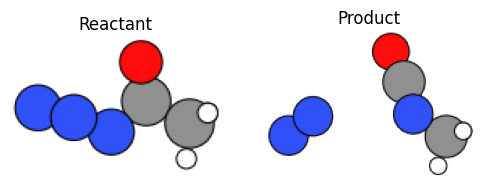

In [4]:
from ase.io import write
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

write("output/curtius_react.png", react, rotation="0x,0y,0z")
write("output/curtius_prod.png", prod, rotation="0x,0y,0z")

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
ax0, ax1 = axes
ax0.imshow(mpimg.imread("output/curtius_react.png"))
ax0.set_axis_off()
ax0.set_title("Reactant")
ax1.imshow(mpimg.imread("output/curtius_prod.png"))
ax1.set_axis_off()
ax1.set_title("Product")
fig.show()

In [5]:
from pfcc_extras.visualize.view import view_ngl

view_ngl([react, prod], representations=["ball+stick"], replace_structure=True)

We will start to run NEB calculations from here. NEB is a method for finding reaction paths by interpolating many discrete structures between the structures before and after the reaction and then performing structural optimization on the combination of these structures in phase space.


We can use the functions in ASE for both interpolating the intermediate structure and performing NEB calculation. Note that in order to run the NEB calculation in parallel, we create a unique calculator instance for each structure, and specify `allow_shared_calculator=False, parallel=True` for `NEB`. 

Because NEB contains multiple structures internally, the time cost of one step is greater than that of MD. Nevertheless, such a calculation can be completed in a few minutes with PFP, compared to several days or months with quantum chemical computation, e.g. DFT.

The calculations are performed in the following steps

 - First, create a list of ASE atoms as `images`.
   - The first one is the reactant `react`, and the last one is the product `prod`.
   - The coordinates of intermediate `image` will be changed later with the `neb.interpolate()` method. Here, we only need to make a copy here.
   - In this case, we have created 7 intermediate images, for a total of 9 images.
 - Create and set a `calculator` for each atoms.
 - Create [NEB class](https://databases.fysik.dtu.dk/ase/ase/neb.html)
     - `k` is the spring constant that represents the strength of the spring connecting each `images`.
     - By setting `climb=True`, we use the Climbing Image NEB method, which is a method that reverts the energy gradient to find transition states.
 - `neb.interpolate()`
     - Linear interpolation of the `images` is executed to create a list of coordinates that gradually change from reactant to product.
     - The initial configuration (candidates) of the reaction paths can be confirmed by commenting out the line with `view_ngl`.
 - optimization with `FIRE`
     - The obtained reaction pathway candidates are modified to the appropriate reaction pathway by optimizing them using the `FIRE` method.

In [6]:
images = [react.copy()]
images += [react.copy() for i in range (7)]
images += [prod.copy()]
for image in images:
    estimator = Estimator(calc_mode=EstimatorCalcMode.CRYSTAL, model_version="v2.0.0")
    calculator = ASECalculator(estimator)
    image.calc = calculator
neb = NEB(images, k=0.1, climb=True, allow_shared_calculator=False, parallel=True)
neb.interpolate()
# Check interpolated images
# view_ngl(images, representations=["ball+stick"], replace_structure=True)
opt = FIRE(neb)
status = opt.run(fmax=0.05, steps=500)

      Step     Time          Energy          fmax
FIRE:    0 14:43:27      -38.199809       23.490956
FIRE:    1 14:43:27      -39.254621        6.505189


/tmp/ipykernel_25517/2722927025.py:8: FutureWarning: Please import NEB from ase.mep, not ase.neb.
  neb = NEB(images, k=0.1, climb=True, allow_shared_calculator=False, parallel=True)


FIRE:    2 14:43:27      -39.008617       11.163567
FIRE:    3 14:43:27      -39.405844        7.057152
FIRE:    4 14:43:27      -39.450020        6.904893
FIRE:    5 14:43:27      -39.462435        5.353684
FIRE:    6 14:43:27      -39.478987        3.718861
FIRE:    7 14:43:27      -39.489786        3.016063
FIRE:    8 14:43:27      -39.491198        2.897458
FIRE:    9 14:43:27      -39.488352        3.915679
FIRE:   10 14:43:27      -39.488606        4.039161
FIRE:   11 14:43:28      -39.495308        3.512413
FIRE:   12 14:43:28      -39.507829        2.810146
FIRE:   13 14:43:28      -39.519259        1.817654
FIRE:   14 14:43:28      -39.525174        3.265853
FIRE:   15 14:43:28      -39.539539        2.892644
FIRE:   16 14:43:28      -39.572475        1.963444
FIRE:   17 14:43:28      -39.604964        2.303778
FIRE:   18 14:43:28      -39.606562        2.028061
FIRE:   19 14:43:28      -39.609304        1.513654
FIRE:   20 14:43:28      -39.612562        0.948627
FIRE:   21 1

If you want to suppress default logging, please specify the `logfile` parameter like `FIRE(neb, logfile=None)`.

Let's look at the results. The Notebook environment is also suitable for the graphical visualization of numerical data. Below is a visualization of an energy profile using matplotlib.

You can see the energy going up once and then going down in the reaction. The energy difference between the point of maximum energy (transition state) and each of the left and right stable points corresponds to the activation energy.

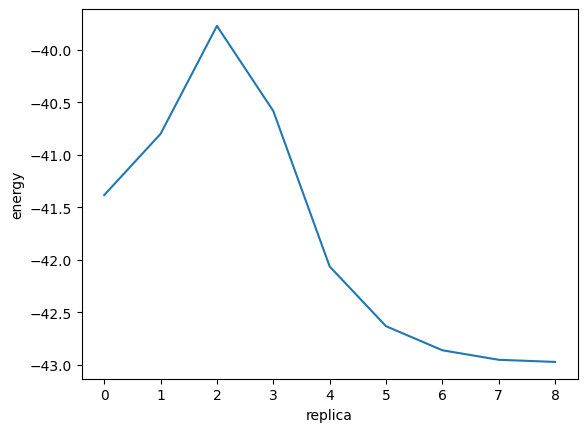

In [7]:
energies = np.array([image.get_total_energy() for image in images])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(energies)
ax.set_xlabel("replica")
ax.set_ylabel("energy")
fig.show()

The activation energy can be calculated as follows.

Here, the activation energy in the forward reaction X→Y is denoted as `E_act_forward`, and reverse reaction Y→X is denoted as `E_act_backward`.

In [8]:
# Transition state takes maximum energy in the reaction path
ts_index = np.argmax(energies)

E_act_forward = energies[ts_index] - energies[0]
E_act_backward = energies[ts_index] - energies[-1]

print(f"ts_index       = {ts_index}")
print(f"E_act_forward  = {E_act_forward:.2f} eV")
print(f"E_act_backward = {E_act_backward:.2f} eV")

ts_index       = 2
E_act_forward  = 1.61 eV
E_act_backward = 3.20 eV


You can visualize the structure in the Notebook as well, or you can save the image as a file. Let's have a try.

The results are output as a trajectories rather than a single structure since it is NEB calculation. Let's save it as an animated GIF using ASE.

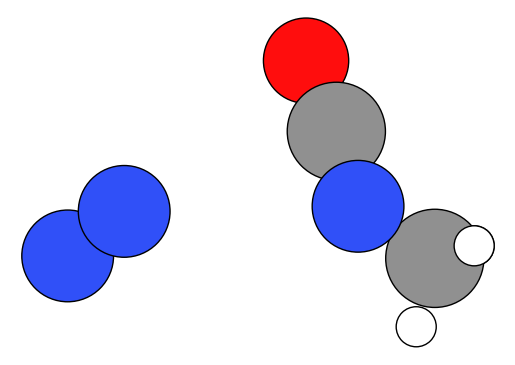

In [9]:
fig = plt.figure(facecolor="white")
ax = fig.add_subplot()
ase.io.write(
    "output/curtius_NEB.gif",
    images,
    format="gif",
    ax=ax
)

You can see a static image of the final structure above, but if you double-click on "curtius_NEB.gif" in the file viewer on the left, you can directly see the animated GIF.

If the calculations are successful, you will see the following animated GIFs.

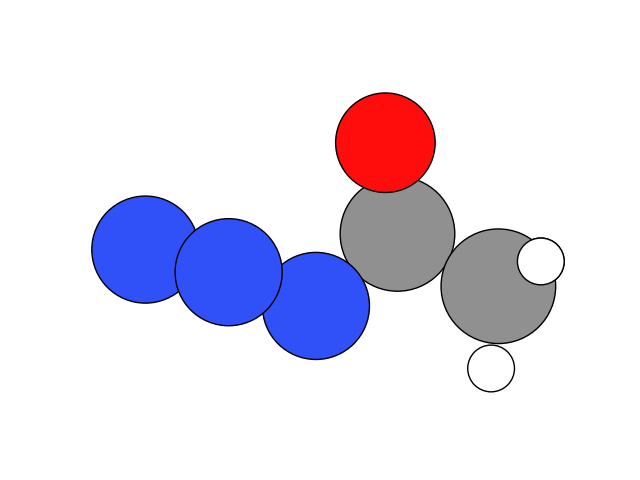

In [10]:
Image("output/curtius_NEB.gif", format="gif")

Finally, let's compare how the NEB method changed the reaction path before and after optimization.

Call the `neb.interpolate()` function and compare the energy of the candidate structure `interpolated_images` of the reaction pathway before FIRE opt, and `images` after optimization by the NEB.

In [11]:
_images = [react.copy()]
_images += [react.copy() for i in range (7)]
_images += [prod.copy()]
for image in _images:
    estimator = Estimator()
    calculator = ASECalculator(estimator)
    image.calc = calculator
neb = NEB(_images, k=0.1, climb=True, allow_shared_calculator=False, parallel=True)
neb.interpolate()
interpolated_images = _images

/tmp/ipykernel_25517/4187733795.py:8: FutureWarning: Please import NEB from ase.mep, not ase.neb.
  neb = NEB(_images, k=0.1, climb=True, allow_shared_calculator=False, parallel=True)


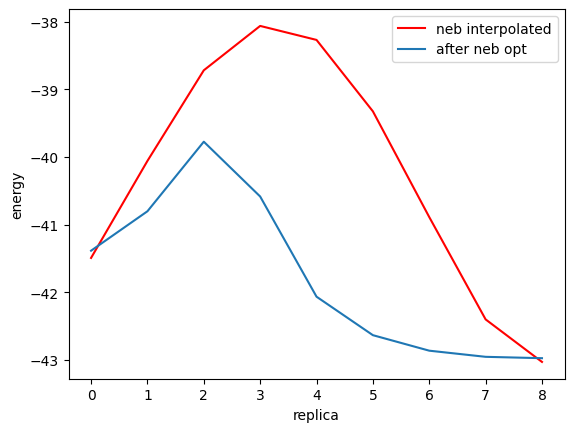

In [12]:
initial_energies = [image.get_total_energy() for image in interpolated_images]
opt_energies = [image.get_total_energy() for image in images]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(initial_energies, label="neb interpolated", color="red")
ax.plot(energies, label="after neb opt")
ax.set_xlabel("replica")
ax.set_ylabel("energy")
ax.legend()
fig.show()

As can be seen from the above figure, NEB method has led to the discovery of a pathway with lower activation energy than the candidate reaction pathway (red line), i.e., a pathway with lower transition state energy (blue line).

## [Column] Comparison of reaction pathway analysis methods and molecular dynamics

In this section, the reaction pathway was explored using the NEB method, which specifies the starting and ending states.

Molecular dynamics (MD) methods, described in the next chapter, can follow the time evolution of atoms. So, what about running the MD simulation until the chemical reaction occurs naturally? <br/>
There are examples where activation energies can be analyzed by MD as well. The diffusion phenomenon of the Li ion is such an example.

 - [Li diffusion in Li10GeP2S12 sulfide solid electrolyte | MATLANTIS](https://matlantis.com/calculation/li-diffusion-in-li10gep2s12-sulfide-solid-electrolyte)

However, **reaction time** is a challenging issue in general. <br/>
Reactions are rare events. 
As you can see from the Arrhenius equation, it is a phenomenon whose frequency of occurrence changes exponentially with respect to the activation energy $E_a$.

$$k = A \exp \left(- \frac{E_a}{k_B T} \right)$$

Therefore, MD can see the reaction if the activation energy is very low.
However, if the activation energy becomes higher, the reaction does not occur in the time scale that MD can handle (~ns) and cannot be detected efficiently.
Futhermore, if the activation energy is even higher, it will be a phenomenon that does not occur even in the real world.

For reference, let us look at the relationship between activation energy and the likelihood of a phenomenon. At 300 K, which is about room temperature, the value of $k_B T$, which is the denominator inside the exponential function of the Arrhenius equation, is roughly 0.026 eV.
This means that the occurrence probablilty of a phenomenon with 1 eV higher activation energy is reduced by a factor of $\exp\left(-1/0.026\right)$, or $2\times10^{-17}$. 
Even considering the difference between macroscale and atomic scale, this is still a large differencet and the reaction can be regarded as a rare event.
Similarly, $k_B T$ is 0.086 eV and 0.172 eV at 1000 K and 2000 K, respectively. It means that the likelihood of a phenomenon with 1 eV higher activation energy is about $9 \times10^{-6}$ and $0.003$ times lower, respectively. 
This is significantly larger than the value at 300 K, and can be regarded as a frequently occurring phenomenon on the macroscopic scale.
In general, the occurrence probability  of the phenomenon is very sensitive to the activation energy and temperature.
By using reaction path analysis such as the NEB method, it is possible to efficiently analyze such rare events across exponential scales.

In [13]:
from ase.units import kB
from math import exp

for T in [300, 1000, 2000]:
    kBT = kB * T
    ratio = exp(-1 / (kBT))

    print(f"----- T = {T} K -----")
    print(f"kB T : {kBT:.3f}")
    print(f"ratio: {ratio:.2e}")

----- T = 300 K -----
kB T : 0.026
ratio: 1.59e-17
----- T = 1000 K -----
kB T : 0.086
ratio: 9.12e-06
----- T = 2000 K -----
kB T : 0.172
ratio: 3.02e-03


In this sense, it may be possible to efficiently explore reactions that are difficult to see with MD by using the NEB method.

In addition, several approaches for reaction path searching are described below.

<table>
  <tr>
    <th width="250">Approach</th>
    <th >Characteristic</th>
    <th width="150">Methods</th>
  </tr>
  <tr>
    <td>Reaction pathway search for a specific reaction pathway</td>
    <td>A method to find the minimum energy path (MEP) in a neighborhood starting from a path connecting two stable structures. Although the MEP and the corresponding transition state can be found with relatively low computational cost, the results strongly depend on the reaction path assumed before the search because it is local search method.</td>
    <td>NEB, String method etc.</td>
  </tr>
  <tr>
    <td>Reaction path search without assuming reaction paths in advance</td>
    <td>A method to find one or more reaction pathways without a priori assumptions about reaction pathways or post-reaction structures. In addition to the standard method of MD, there are other methods such as metadynamics, which aims to efficiently search for energy surfaces, and a method that uses information on local energy surfaces to search (ADDF).</td>
      <td>MD, metadynamics, ADDF etc.</td>
  </tr>
</table>

## Reference

The following references may be useful to those who would like to study further.

 - [GRRM : Global Reaction Route Mapping](https://iqce.jp/GRRM/index_e.shtml)